# Product Classification for E-Commerce
### ITEC 657
#### Praneet Shetty - 45464006
#### Ashmit Bhattarai - 45567190

## Problem Formulation 

In the field of E-Commerce, the products are classified under different retailers under different categorical heirarchy. We seek to simplify this by modelling a Text Classifier which can classify the retailers' E-commerce products into a standard products targets classes defined by [GS1 Standards](https://www.gs1.org/standards/gpc). The goal is to find out which machine learning methods is best for solving it.

By solving this problem, not only we seek to create a standard dataset for E-commerce products classification but a reliable model helps in automation For Eg: a new products that comes to a new retailer then scanning the barcode and accessing the Product Title and Description the new product can be automatically classified into respective categories.

# Data Exploration-

For this project, We have collected data from different e-commercce website mainly [Woolworth](https://www.woolworths.com.au/),[Coles](https://shop.coles.com.au/).

#### Tools used for Data Crawl
 - [Scrapy](https://scrapy.org/)
 - [Python-Selenium](https://selenium-python.readthedocs.io/)

The Data crawled from the source were Product Titles, Descriptions and respective Categories given to the products by the retailers. Now, we look at the Data Crawled and prepare them for Text Classification.

In [29]:
import pandas as pd
import numpy as np
import warnings,json
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df1=pd.read_csv("Woolies.csv",skip_blank_lines = True,sep = ",")
df2=pd.read_csv("Coles.csv",skip_blank_lines = True,sep = ",")

In [14]:
df1.tail()

,categories,description,name,retailer,Category id
4805,Health & Beauty_Cosmetics,Revlon Colorstay™ Lipliner Mauve<p>Revlon Colo...,Revlon Colorstay Lipliner Mauve,woolworths,Beauty
4806,"Baby"",""Freezer_Frozen Meals"",""Baby Food",<div>Delicious six vegetable ravioli cooked wi...,Annabel Karmel 6 Veggie Ravioli,woolworths,Food
4807,"Dairy, Eggs & Fridge_Ready to Eat Meals",Woolworths Roasted Garlic Potato Mash consists...,Woolworths Roasted Garlic Mash,woolworths,Food
4808,"Health & Beauty_Skin Care"",""Shower, Bath & Soap",<p>Indulge your skin with Palmolive Luminous O...,Palmolive Luminous Oils Rejuvenating,woolworths,Personal Care
4809,Freezer_Ice Cream,<p>We're committed to bringing you good qualit...,Woolworths Ice Cream Cones Caramel,woolworths,Dairy


In [15]:
df2.tail()

,Unnamed: 0,category,description,title,Category
484,484,Health & Beauty_Dental,With a fresh mint flavour gel for confident fr...,Colgate Total Advanced Fresh Toothpaste 190g,Hygiene
485,485,Health & Beauty_Dental,Colgate Max Fresh with Mini Breath StripsInvig...,Colgate Max Fresh Cool Mint Toothpaste 110g,Hygiene
486,486,Health & Beauty_Dental,My First Colgate has been developed to help yo...,Colgate Junior Toothpaste 45g,Hygiene
487,487,Health & Beauty_Dental,Benefits:Strengthens tooth enamel and helps pr...,Colgate Triple Action Toothpaste 160g everyday...,Hygiene
488,488,Health & Beauty_Dental,An important part of your daily oral hygiene r...,Colgate Total Mint Waxed Dental Floss 100m,Hygiene


### Data Preprocessing

**Removing the HTML Tags in the description column**

We remove the HTML tags and HTML encoded characters by replacing them with $value=''$ (empty string) and using encoding as Unicode.

In [10]:
tags_list = ['<p>' ,'</p>' , '<p*>',
             '<ul>','</ul>',
             '<li>','</li>',
             '<br>','<div>'
             '<strong>','</strong>',
             '<span*>','</span>',
             '<a href*>','</a>',
             '<em>','</em>']

for tag in tags_list:

    df1['description'].replace(to_replace=tag, value='', regex=True, inplace=True)
    df2['description'].replace(to_replace=tag, value='', regex=True, inplace=True)


In [11]:
print(df1.columns.values)
print(df2.columns.values)

['categories' 'description' 'name' 'retailer' 'Category id']
['Unnamed: 0' 'category' 'description' 'title' 'Category']


#### Check and Remove Null values
Next we filter the dataset by removing Null Values from data, especially from the Title and Description.

In [16]:
df1.count() 

categories     4808
description    4807
name           4808
retailer       4808
Category id    4808
dtype: int64

We can see that there are 4808 items collected from <b>Woolworths</b>. This is our training data.

In [17]:
df1.isnull().sum() #Check any Null values in the df

categories     2
description    3
name           2
retailer       2
Category id    2
dtype: int64

In [23]:
df1=df1[pd.notnull(df1['name'])]  #delete the Nan rows in 'Name Columns'
df1=df1[pd.notnull(df1['description'])]  #delete the Nan rows 'Description columns'
print(df1.isnull().sum()) #Check any Null values in the df

categories     0
description    0
name           0
retailer       0
Category       0
dtype: int64


In [24]:
df1.count()

categories     4807
description    4807
name           4807
retailer       4807
Category       4807
dtype: int64

#### After Cleaning Wooli data has 4807 records

**Checking for coles data **

In [95]:
df2.count()

categories     489
description    489
name           489
Category       489
dtype: int64

#### 489 items from Coles data

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
categories     489 non-null object
description    489 non-null object
name           489 non-null object
Category       489 non-null object
dtypes: object(4)
memory usage: 15.4+ KB


In [25]:
df2.isnull().sum() #Check any Null values in the df

categories     0
description    0
name           0
Category       0
dtype: int64

#### No Null entry found in the coles data

##### copying the values into another df for further use

In [98]:
df_wool=df1.copy()
df_coles=df2.copy()

### Merging both the datasets into a single dataset

In [21]:
Data=df1.append(df2,ignore_index = True)

In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299 entries, 0 to 5298
Data columns (total 9 columns):
Category       489 non-null object
Category id    4808 non-null object
Unnamed: 0     489 non-null float64
categories     4808 non-null object
category       489 non-null object
description    5296 non-null object
name           4808 non-null object
retailer       4808 non-null object
title          489 non-null object
dtypes: float64(1), object(8)
memory usage: 372.7+ KB


In [28]:
Data[4800:4820]

,Category,categories,description,name,retailer
4800,Food,Freezer_Frozen Meat,Ingham's Chicken Breast Tenders Sweet Chilli i...,Ingham's Chicken Tender Sweet Chilli,woolworths
4801,Electronics,Household_Electronics,<div>- Maximizes battery performance</div><div...,Energizer Smart Battery Charger,woolworths
4802,Beauty,Health & Beauty_Cosmetics,Revlon Colorstayâ„¢ Lipliner MauveRevlon Color...,Revlon Colorstay Lipliner Mauve,woolworths
4803,Food,"Baby"",""Freezer_Frozen Meals"",""Baby Food",<div>Delicious six vegetable ravioli cooked wi...,Annabel Karmel 6 Veggie Ravioli,woolworths
4804,Food,"Dairy, Eggs & Fridge_Ready to Eat Meals",Woolworths Roasted Garlic Potato Mash consists...,Woolworths Roasted Garlic Mash,woolworths
4805,Personal Care,"Health & Beauty_Skin Care"",""Shower, Bath & Soap",Indulge your skin with Palmolive Luminous Oils...,Palmolive Luminous Oils Rejuvenating,woolworths
4806,Dairy,Freezer_Ice Cream,We're committed to bringing you good quality f...,Woolworths Ice Cream Cones Caramel,woolworths
4807,Food,Frozen_Frozen Meat,We're Stegglers for quality time.Quality time....,Steggles Frozen Chicken Tempura Dino Snacks 40...,NaN
4808,Food,Frozen_Frozen Meat,We're Stegglers for quality time.Quality time....,Steggles Frozen Crumbed Chicken Breast Tenders...,NaN
4809,Food,Frozen_Frozen Meat,We're Stegglers for quality time.Quality time....,Steggles Chicken Breast Tenders Southern Style...,NaN


 Hence the total data obtained is 5296[4807+489] entries in the final Dataset by Merging Coles and Woolworths data.

## Analysis of Data

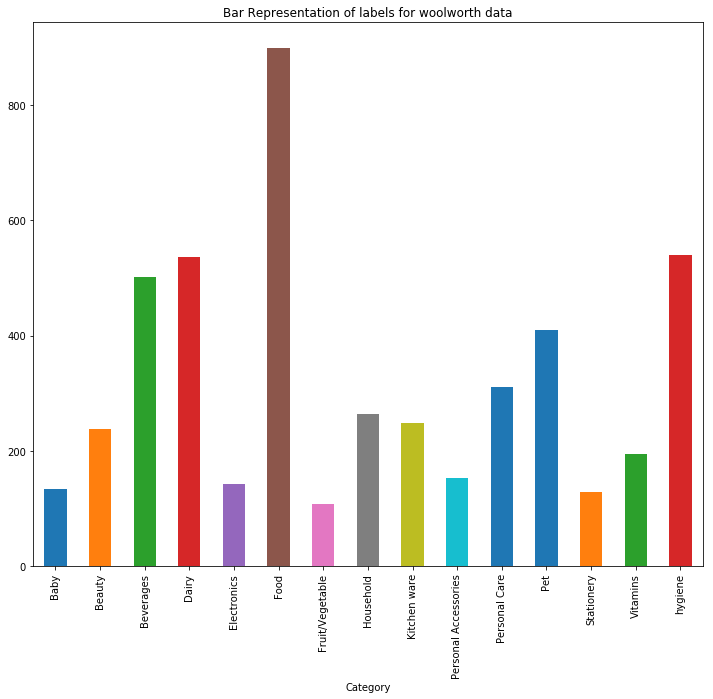

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
df1.groupby('Category').name.count().plot.bar(ylim=0)
plt.title("Bar Representation of labels for woolworth data")
plt.savefig("img_wool.png")
A=plt.show()

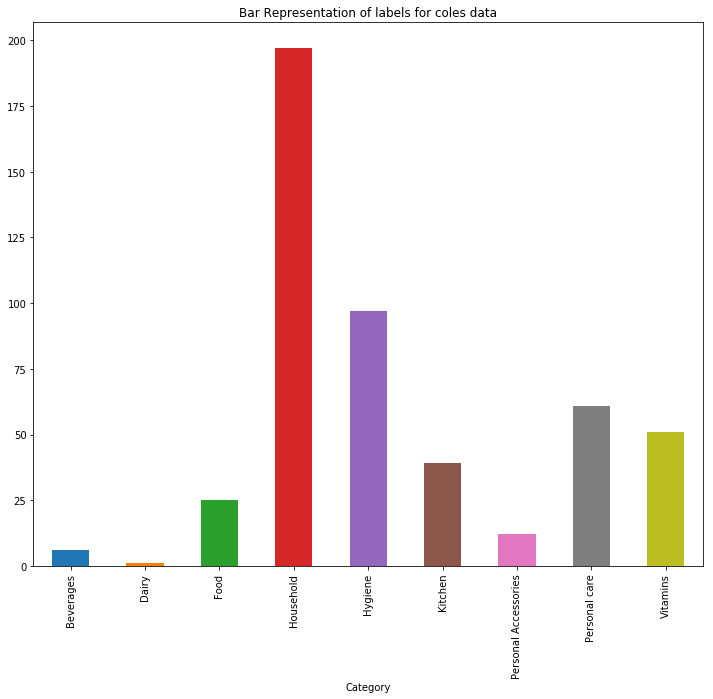

In [31]:
fig = plt.figure(figsize=(12,10))
df2.groupby('Category').name.count().plot.bar(ylim=0)
plt.title("Bar Representation of labels for coles data")
plt.savefig("img_coles.png")
A=plt.show()

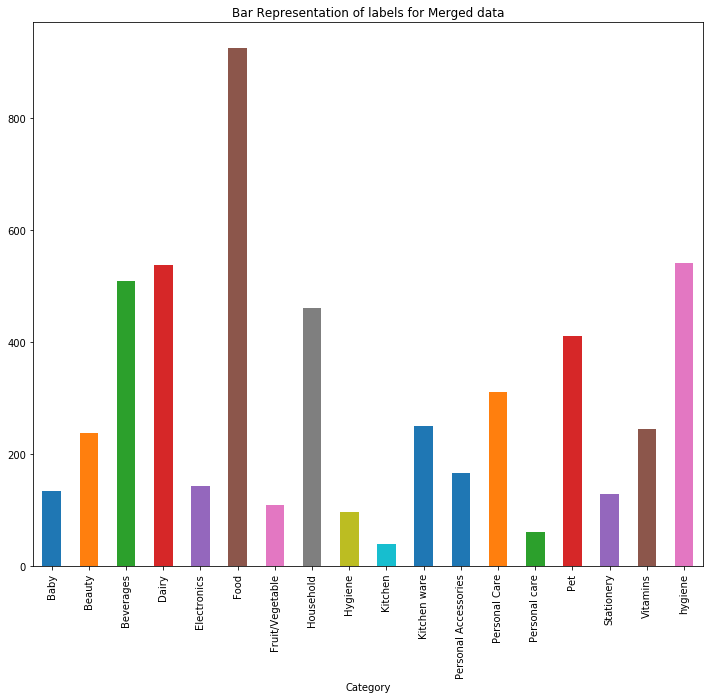

In [32]:
fig = plt.figure(figsize=(12,10))
Data.groupby('Category').name.count().plot.bar(ylim=0)
plt.title("Bar Representation of labels for Merged data")
plt.savefig("img_Data.png")
A=plt.show()

In [33]:
Data.tail()

,Category,categories,description,name,retailer
5291,Hygiene,Health & Beauty_Dental,With a fresh mint flavour gel for confident fr...,Colgate Total Advanced Fresh Toothpaste 190g,NaN
5292,Hygiene,Health & Beauty_Dental,Colgate Max Fresh with Mini Breath StripsInvig...,Colgate Max Fresh Cool Mint Toothpaste 110g,NaN
5293,Hygiene,Health & Beauty_Dental,My First Colgate has been developed to help yo...,Colgate Junior Toothpaste 45g,NaN
5294,Hygiene,Health & Beauty_Dental,Benefits:Strengthens tooth enamel and helps pr...,Colgate Triple Action Toothpaste 160g everyday...,NaN
5295,Hygiene,Health & Beauty_Dental,An important part of your daily oral hygiene r...,Colgate Total Mint Waxed Dental Floss 100m,NaN


From above, we can see bar Graph representation of the target categories of the Data labelled under [GS1 Standard](https://www.gs1.org/standards/gpc). It shows that Hygene and Food comprises majority of the datasets.

### WordCloud
Word clouds help us get the gist of text data and see the dominant words that define a particular dataset. Comapring the word cloud with Training data (Woolworths Data) with Test data (Coles data) helps us see if the Training Sample infact does represent the Test Sample. 

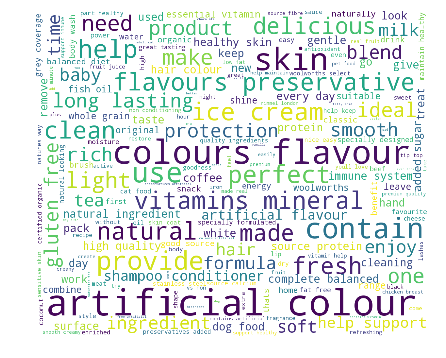

In [26]:
from classify import generate_wordcloud
plt.figure(figsize=(7,7))
generate_wordcloud("Woolies.csv")

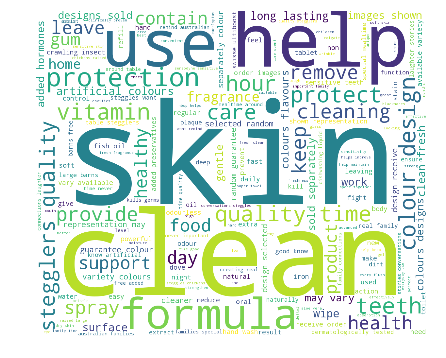

In [27]:
plt.figure(figsize=(7,7))
generate_wordcloud("Coles.csv")

After cleaning the test from WildCard Characters such as (,,',+,-,=,%,& etc)and removing the stopwords the World Cloud.e can see that for Woolworths the data has mostly Food and Hygene related words and coles has dominant numbers of Hygene related words in the word cloud. This means the total ratio of Hygene products in test set is higher that the total ratio of Hygene items in Training set.

### Label Encoding the Category column 
Now, we proceed to prepare the data for training purpose by labelling categorical Data using [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder).

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Category'])
list(le.classes_)        

#Creating a  new Df with label column for encoding purpose
data1=pd.DataFrame()
data1['Category_ID']=Data['Category']   
data1['Cat_ID'] = data1.apply(le.fit_transform)  #Encoding the label into numeric form
data1.tail()
#data1['Cat_ID'].info()

,Category_ID,Cat_ID
5291,Hygiene,8
5292,Hygiene,8
5293,Hygiene,8
5294,Hygiene,8
5295,Hygiene,8


In [35]:
Data['Cat_ID']=data1['Cat_ID']

In [36]:
Data[4900:4920]

,Category,categories,description,name,retailer,Cat_ID
4900,Household,Household_Bathroom,Duck Liquid Rim Block keeps your toilet clean ...,Duck Extended Clean Aqua Burst Toilet Cleaner ...,NaN,7
4901,Household,Household_Bathroom,Wish your toilet would always be as clean and ...,Bref Blue Active Lemon 50g,NaN,7
4902,Household,Household_Bathroom,Our strongest Bref 10xEffect formula will help...,Bref Lavender Toilet Gel Colour Change Indicat...,NaN,7
4903,Household,Household_Bathroom,The innovative formula of Bref 10xEffect will ...,Bref Lemon Toilet Gel Micro Brush 450mL,NaN,7
4904,Household,Household_Bathroom,"Now with +40% freshness, the innovative formul...",Bref Power Active Toilet Cleaner Lemon 50g,NaN,7
4905,Household,Household_Bathroom,Sorbent has always known that it's more than j...,Sorbent 2 Ply Extra Thick Hypo Allergenic Toil...,NaN,7
4906,Household,Household_Bathroom,Sorbent has always known that it's more than j...,Sorbent 2 Ply Extra Thick White Toilet Paper 2...,NaN,7
4907,Household,Household_Bathroom,"- With CleanRipple technology, specifically de...",Kleenex Complete Clean White Toilet Tissue 18 ...,NaN,7
4908,Household,Household_Bathroom,"- With CleanRipple technology, specifically de...",Kleenex Complete Clean Toilet Tissue 9 pack,NaN,7
4909,Household,Household_Bathroom,5in1.- Bleach Clean.- Cleans Under The Rim.- R...,White King Lemon Power Toilet Cleaner Gel 700mL,NaN,7


In [109]:
Data.Cat_ID.value_counts()

5     924
17    540
3     537
2     508
7     461
14    410
12    311
10    249
16    245
1     237
11    165
4     142
0     134
15    128
6     108
8      97
13     61
9      39
Name: Cat_ID, dtype: int64

**AS seen in the Graphical Represenation and also numerical,  most of the proucts are labelled in the category,Food,Hygiene...**

## TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [41]:
features = tfidf.fit_transform(Data.description).toarray()
labels = Data['Cat_ID']
labels1= Data['Category']

features.shape

(5296, 11902)

In [112]:
labels.shape

(5296,)

Here we have converted the text values into numeric by using TFIDF on the description column and Label Encoding method for Categories column.

**Thus finally we have our data with categories columns and Description column in numeric Format .
Lets Carry on with machine learning Models and get the accuracy .**

## Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


## Splitting the  woolies data for train and coles data for test

As Both the datasets were appended ,first 4808 rows are from woolies data and the rest were from coles so ,
**X_Train** will be Woolworths
**X_Test** will be coles.

In [45]:
X_train=features[0:4806] # woolies Data
y_train=labels[0:4806]
X_test=features[4807:]   #coles data
y_test=labels[4807:]

#### Training the model on Woolies records and testing on Coles data

In [46]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
A=(accuracy_score(y_test,y_pred))

0.32515337423312884


In [47]:
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  1  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 72 84  0  0 30  0  4  0  1  1  0  4]
 [ 0  0  0  4  0  0  0  0  0 51  0  0  0  0 42]
 [ 0  0  0  2 18  0  0 16  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  4  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1 42  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  4  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


### Training on Coles data and testin on woolie

In [48]:
lr.fit(X_test,y_test)
y_pred = lr.predict(X_train)

print(accuracy_score(y_train,y_pred))
A1=accuracy_score(y_train,y_pred)

0.07990012484394507


In [49]:
print(confusion_matrix(y_train,y_pred))

[[  0   0   0   0   0   0   0 125   3   0   0   0   0   4   0   0   2   0]
 [  0   0   0   0   0   0   0 227   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0 502   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 535   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 142   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   9   0 890   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 263   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 239   0  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0   0   0   0   1   0   0   1   0]
 [  0   0   0   0   0   0   0 134  73   0   0   0   0  98   0   0   6   0]
 [  0   0   0   0   0   0

In [69]:
log=pd.DataFrame()
log['Train_accuracy']= [A]
log['Test_accuracy']= [A1]
print(log)

   Train_accuracy  Test_accuracy
0        0.325153         0.0799


# Multinomial Naive Bayes

### Training the model on Coles Data and testing on Woolies Data

In [70]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_test, y_test) #Fitting the model on the test data[Coles]

In [71]:
y_pred = clf.predict(X_train)
print("Accuracy is ",np.mean(y_train == y_pred))
B1=np.mean(y_train == y_pred)

Accuracy is  0.08114856429463171


In [72]:
print(confusion_matrix(y_train,y_pred))

[[  0   0   0   0   0   0   0 120  10   0   0   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0 233   2   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0 498   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 534   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 142   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11   0 888   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 263   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 241   0   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 153   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 133 105   0   0   0   0  67   0   0   6   0]
 [  0   0   0   0   0   0

### Training on woolie and testing on coles

In [73]:
X_train=features[0:4806] # woolies Data
y_train=labels[0:4806]
X_test=features[4807:]   #coles data
y_test=labels[4807:]

In [74]:
clf = MultinomialNB().fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("Accuracy is ",np.mean(y_test == y_pred))
B=np.mean(y_test == y_pred)

Accuracy is  0.3333333333333333


In [75]:
print(confusion_matrix(y_test,y_pred))

[[ 0  0  5  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 34 90  0  0 20  0  7  0 31  0 13]
 [ 0  0  4  0  0  0  0  0 49  0  0  1 43]
 [ 0  0  2 18  0  0 15  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  1  0  0  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  1 35  0  0  0 22]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  4  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [77]:
MNB=pd.DataFrame()
MNB['Train_accuracy']= [B]
MNB['Test_accuracy']= [B1]
print(MNB)

   Train_accuracy  Test_accuracy
0        0.333333       0.081149


In [95]:
D=log.append(MNB,ignore_index = True)
D['Model Name']=('Logistic Regression','Multinomial Naive Bayes')
D

,Train_accuracy,Test_accuracy,Model Name
0,0.325153,0.079900,Logistic Regression
1,0.333333,0.081149,Multinomial Naive Bayes


Thus on manually classifying the products into labels  we see very low Accuracy Score.
Lets check the accuracy Score byclassifying the products using clustering  and then carry on with our process

# Clustering

In [97]:
Cluster=Data.copy() #Storing in a DF
Cluster.head()

,Category,categories,description,name,retailer,Cat_ID
0,Food,Bakery_Packaged Bread & Bakery,<div>With the goodness of seeds and grains. Gl...,Woolworths Free From Gluten Seeded Bread,woolworths,5
1,hygiene,Health & Beauty_Hair Care,Head & Shoulders Dry Scalp Care Anti-Dandruff ...,Head & Shoulders Dry Scalp Care With Almond Oi...,woolworths,17
2,Electronics,Household_Electronics,Can also be used in other applications where a...,Philips Oven Globe 25w Ses Base,woolworths,4
3,Food,Bakery_Packaged Bread & Bakery,Sara Lee Luxurious Berry Coulis Baked Cheeseca...,Sara Lee Baked Cheesecake Berry Coulis,woolworths,5
4,Beauty,Health & Beauty_Cosmetics,Mud Make-Up Design CC Cream Hydrating Colour C...,Mud Cc Cream 002 Medium To Dark,woolworths,1


Dropping the not required columns

In [98]:
Cluster=Cluster.drop(['categories','Category','Cat_ID','name','retailer'],axis =1)

In [99]:
Cluster.head()

,description
0,<div>With the goodness of seeds and grains. Gl...
1,Head & Shoulders Dry Scalp Care Anti-Dandruff ...
2,Can also be used in other applications where a...
3,Sara Lee Luxurious Berry Coulis Baked Cheeseca...
4,Mud Make-Up Design CC Cream Hydrating Colour C...


In [101]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=18)


#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [103]:
features1 = tfidf.fit_transform(Cluster.description).toarray()
features1.shape

(5296, 11902)

In [104]:
model.fit(features1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=18, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [106]:
predict1=model.predict(features)  #predicting the label for each features

In [107]:
predict=pd.DataFrame(predict1) 
predict.columns=['Labels']
predict['description']=Data['description']
predict[4800:4820]

,Labels,description
4800,10,Ingham's Chicken Breast Tenders Sweet Chilli i...
4801,14,<div>- Maximizes battery performance</div><div...
4802,11,Revlon Colorstayâ„¢ Lipliner MauveRevlon Color...
4803,14,<div>Delicious six vegetable ravioli cooked wi...
4804,17,Woolworths Roasted Garlic Potato Mash consists...
4805,2,Indulge your skin with Palmolive Luminous Oils...
4806,17,We're committed to bringing you good quality f...
4807,10,We're Stegglers for quality time.Quality time....
4808,10,We're Stegglers for quality time.Quality time....
4809,10,We're Stegglers for quality time.Quality time....


In [110]:
predict['Labels'].value_counts()

11    1340
1      491
2      457
8      444
7      327
15     293
17     293
9      242
0      195
14     194
4      184
3      178
6      172
13     155
5      138
16      78
12      76
10      39
Name: Labels, dtype: int64

<Figure size 864x720 with 0 Axes>

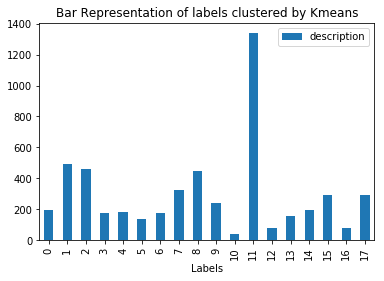

In [114]:
fig = plt.figure(figsize=(12,10))
predict.groupby('Labels').count().plot.bar(ylim=0)
plt.title("Bar Representation of labels clustered by Kmeans")
plt.savefig("img_Kmeans.png")
A=plt.show()

 Most of the products are classified into group 11

**Again converting the Text column into Numeric using TFIDF and processing the machine learning methods.**

In [117]:
features2 = tfidf.fit_transform(predict.description).toarray()
labels_predict = predict['Labels']

features2.shape

(5296, 11902)

In [141]:
X_train=features2[0:4806] # woolies Data
y_train=labels_predict[0:4806]
X_test=features2[4807:]   #coles data
y_test=labels_predict[4807:]



### Logistic Regression

**Training Accuracy**

In [142]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
C=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7300613496932515
[[  5   0   0   0   0   0   0   0   4   0   0   0]
 [  0   1   0   0   0   0   0   0   4   0   0   0]
 [  0   0  77   0   0   0   0   0   2   0   0   0]
 [  0   0   0  31   0   0   0   0  23   0   0   0]
 [  0   0   1   0  59   2   0   0  43   0   0   0]
 [  0   0   0   0   0   2   0   0   4   0   0   0]
 [  0   0   0   0   0   0  43   0   6   0   0   0]
 [  0   0   0   0   0   0   0  19   0   0   0   0]
 [  0   0   0   0   0   0   0   0 113   0   0   0]
 [  0   0   0   0   3   0   0   0   7   6   0   0]
 [  0   0   0   0   0   0   0   0   3   0   1   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0]]


**Testing Accuracy**

In [143]:
lr.fit(X_test,y_test)
y_pred = lr.predict(X_train)
C1=accuracy_score(y_train,y_pred)
print(accuracy_score(y_train,y_pred))
#print(confusion_matrix(y_train,y_pred))

0.38555971702039116


In [144]:
log_1=pd.DataFrame()
log_1['Train_accuracy']= [C]
log_1['Test_accuracy']= [C1]
print(log_1)

   Train_accuracy  Test_accuracy
0        0.730061        0.38556


### Multi nomial Naive Bayes

**Training Accuracy**

In [145]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ",np.mean(y_test == y_pred))
D=np.mean(y_test == y_pred)
print(confusion_matrix(y_test,y_pred))

Accuracy is  0.6687116564417178
[[  4   0   0   0   0   0   0   0   5   0   0   0]
 [  0   3   0   0   0   0   0   0   2   0   0   0]
 [  0   0  72   0   0   0   0   0   7   0   0   0]
 [  0   0   0  16   0   0   0   0  38   0   0   0]
 [  0   2   2   0  53   2   0   0  46   0   0   0]
 [  0   0   0   0   0   3   0   0   3   0   0   0]
 [  0   0   0   0   0   0  46   0   3   0   0   0]
 [  0   5   0   0   0   0   0  14   0   0   0   0]
 [  0   0   7   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   3   0   0   0   7   6   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0]]


**Testing Accuracy**

In [146]:
clf = MultinomialNB().fit(X_test, y_test)
y_pred = clf.predict(X_train)
print("Accuracy is ",np.mean(y_train == y_pred))
D1=np.mean(y_train == y_pred)
#print(confusion_matrix(y_train,y_pred))

Accuracy is  0.35081148564294634


In [147]:
MNB_1=pd.DataFrame()
MNB_1['Train_accuracy']= [D]
MNB_1['Test_accuracy']= [D1]
print(MNB_1)

   Train_accuracy  Test_accuracy
0        0.668712       0.350811


In [148]:
E=log_1.append(MNB_1,ignore_index = True)
E['Model_name']=['Logistic Regression','Multinomial Naive Bayes']
E.head()

,Train_accuracy,Test_accuracy,Model_name
0,0.730061,0.385560,Logistic Regression
1,0.668712,0.350811,Multinomial Naive Bayes


**Thus if the machine itself does the classification,
The Training and testing Accuracy of the both the models increases**

On the range from 10-20 number of clusters ,lets check on which number of clusters the accuracy is better

### For Kmeans with clusetrs in the range  10-20

In [149]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [150]:
from sklearn.cluster import KMeans
Cluster1=Data.copy()

neighbors=[10,11,12,13,14,15,16,17,18,19,20]
Train_accuracy_Log=[]
Test_accuracy_Log =[]

Train_accuracy_MNB=[]
Test_accuracy_MNB=[]


for i in neighbors:
    model=KMeans(n_clusters = i,random_state= 0)
    model.fit(features)
    pred_model=model.predict(features)# Predicting the label for the features
    
    pred=pd.DataFrame(pred_model)   #Storing the label in DF
    pred.columns=['Labels']       #Naming it label
    pred['description']=Data['description']  #storing the description value
    
    
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
    features3 = tfidf.fit_transform(pred.description).toarray()
    labels_predict = pred['Labels']
  
    X_train=features3[0:4806] # woolies Data
    y_train=labels_predict[0:4806]
    X_test=features3[4807:]   #coles data
    y_test=labels_predict[4807:]
    
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    Train_accuracy_Log.append(accuracy_score(y_test,y_pred))
    
    lr = LogisticRegression()
    lr.fit(X_test,y_test)
    y_pred1 = lr.predict(X_train)
    Test_accuracy_Log.append(accuracy_score(y_train,y_pred1))
    
    X_train=features1[0:4806] # woolies Data
    y_train=labels_predict[0:4806]
    X_test=features1[4807:]   #coles data
    y_test=labels_predict[4807:]

    clf = MultinomialNB().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Train_accuracy_MNB.append(np.mean(y_test == y_pred))
    
    
    clf = MultinomialNB().fit(X_test, y_test)
    y_pred1 = clf.predict(X_train)  
    Test_accuracy_MNB.append(np.mean(y_train == y_pred1))

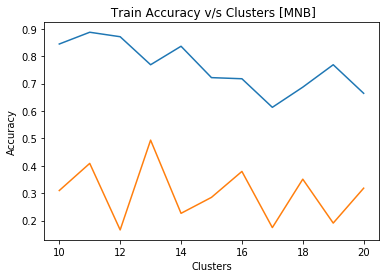

In [171]:
plt.plot(neighbors,Train_accuracy_MNB,)
plt.plot(neighbors,Test_accuracy_MNB,)
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.title(" Train Accuracy v/s Clusters [MNB]")
plt.savefig(" Accuracy vs clusters[MNB].png")
plt.show()


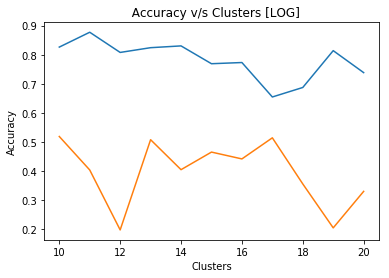

In [170]:
plt.plot(neighbors,Train_accuracy_Log,)
plt.plot(neighbors,Test_accuracy_Log,)
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.title("  Accuracy v/s Clusters [LOG]")
plt.savefig(" Accuracy vs clusters[LOG].png")
plt.show()


**Thus from the above two graphs we see that train & Test accuracy is better when there is a cluster of 13 **

### Recurrent Neural Networks, LSTM (Long Short Term Memory) approach to Products Classification
Since the shallow Machine Learning Algorithms failed to perform, we resorted to training the model via Recurrent Neural Networks using [LSTM layer](https://keras.io/layers/recurrent/#lstm) (Long Short-Term Memory layer - <i>Hochreiter 1997</i>)

### Tools used:
 - [NLTK](https://www.nltk.org/) for Text Preprocessing and removal of Stopwords
 - [Scikit-Learn](https://scikit-learn.org/stable/) for Label Binerizer of Targets
 - [Keras](https://keras.io/) for Deep Learning Implementation with LSTM cells
 
#### Preprocessing 
The data is first removed of non String characters (WildCard Characters), then stopwords are removed from the sentences. Then, using [LabelBinarizer](#) we model Targets (Categories) to make them suitable for fitting the data into Deep Learning model.

##### Word Embeddings
For Deep Learning we model Text Data in different method unlike <i><b>TF-IDF Vectorization</b></i>, we first generate Word Index and we assign each word in our "Vocabulary" an index, we filter words that occur only once throughout the dataset and assign those words, or any futute unseen words as "_unk_" tag.
Here is the word dictionary with words and their respective indices.

In [30]:
words = json.load(open("word.json","r"))
print (words)

{'bread': '13814', '7ml': '2995', 'lunchessecure': '11092', 'fruit/yoghurt': '11735', 'securitypoise': '731', 'fiercely': '795', '1783': '13577', 'ingredientsfor': '4725', 'photo': '8051', '31/03/18': '13216', 'finishesour': '7825', 'fibers': '652', 'lead': '1597', 'blueredblackyellowgreenno': '3638', 'britvic': '11703', 'ownedsupporfina': '15743', 'simon': '12424', 'bickies': '7649', 'lcms': '18116', 'pc': '4898', 'dettori': '9046', 'lambthe': '1864', 'plugs': '16605', 'mistakes': '18021', 'galangal': '14627', 'chapstickaustraliainstagram': '2448', 'vertical': '11779', 'briefwith': '12236', 'baby': '11381', 'sampler': '1929', 'millions': '4206', '1021': '2162', '80g/min': '15717', 'dares': '6048', 'freecholesterol': '14841', 'smoke': '14093', 'pillows': '8981', 'transports': '14383', 'conditionersadded': '12082', 'quorn': '3111', 'connoisseurs': '8234', 'delis': '177', '4%': '9296', 'mission': '335', 'absolutely': '2268', 'pixma': '14939', 'instantno': '8917', 'stickswith': '16976', '

Now, the words are replaced with their indices in respective sentences. This helps in generating Continous Bag of Words (CBOW) representation of text, where each word is represented as One-Hot Encoding where "1" or "0" signifies the probability of the word occuring in the given context.

Furthermore, this representation of Text data is trained in a Shallow Neural Network to generate Word Embeddings. Further information can be found at the link [here](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/).

The RNN model is then trained with the Word Embeddings of Text and Label Binarized Targets as Inputs.
The HyperParameters of the RNN model are:
- Embeddings Size = 50
- Minibatch size = 32
- Number of Epochs = 30
- Validation Split = 20%
- Optimizer - Adam
- Learning Rate = 0.01 (default)

In [1]:
from classify import rnn_train
rnn_train()

/home/ashmit/Legion/lapsico/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


(4807, 321) 18251 321
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 321, 50)           912550    
_________________________________________________________________
lstm_1 (LSTM)                (None, 321, 100)          60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 321, 100)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 321, 100)          10100     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)               

This shows the Deep Leraning Model architechture. The Word Embeddings for the words is fed into LSTM cell with 100 Nodes with maximum sentence size of 321. We use Drop out of 0.2 meaning the Dense Layer which follows the "lstm_1" randomly drops 20% of the 100 Node and trains data with 80% of them. This is a good method to prevent OverFitting of the model. We would want to prevent this as our model has OverFit in case on Shallow Machine Learning Algorithms.

Similarly at the End the fully connected dense layer gives the prediction of the respective classed using Softmax function which return probability of each classes for that particular training data.

### Summary of the Model Performances

|Model/Peformance Metrics|Logistic Regression|Multinomial Naive Bayes|Logistic Regression(After KMeans)|Multinomial NB(After KMeans)|RNN(LSTM)|
| --- | --- | --- | --- | --- | --- |
| Training Accuracy | 0.325153 | 0.333333 | 0.730061 | 0.668712 | 0.8515 |
| Test Accuracy | 0.0799 | 0.081149 | 0.38556 | 0.350811 | 0.608833 |


The above tables shows the accuracy measures of all the models in the range of 0 to 1.


## Discussion

The Shallow Machine Learning and RNN models have clearly overfit. The test acccuracy is far off by training accuracy. Similar case for RNN model. Validation accuracy which is 20% of randomly selected training data also exhibits similar case of overfitting. Hence, the model is not reliable.


## Conclusion
The attempt built a E-Commerce Products classification has failed. In order to correct this model, there are few options that can be adopted such as :

- Using Treebased Classifiers for such Unbalanced Categories such as Random Forest, Decision Trees, etc as prediction model
- Increasing the Word Embeddings size for RNN to add more word similarity measure within the Vocabulary
- We can always add more data as is most case incase of overfitting
- We can add other features such as Brand, Price Range as features to train the models.

In conclusion, there needs more exploration on data and the Machine Learning models for further improvement.